In [1]:
%pylab inline

import os
os.chdir('..')

Populating the interactive namespace from numpy and matplotlib


In [2]:
full_history_filenames = !find data -name 'changes-file-full.csv'
full_history_filenames

['data/mahout/changes-file-full.csv',
 'data/tika/changes-file-full.csv',
 'data/pig/changes-file-full.csv',
 'data/openjpa/changes-file-full.csv',
 'data/bookkeeper/changes-file-full.csv',
 'data/zookeeper/changes-file-full.csv']

In [3]:
goldset_filenames = !find data -name 'changes-file-goldset.csv'
goldset_filenames

['data/mahout/v0.10.0/changes-file-goldset.csv',
 'data/tika/v1.8/changes-file-goldset.csv',
 'data/pig/v0.14.0/changes-file-goldset.csv',
 'data/openjpa/v2.3.0/changes-file-goldset.csv',
 'data/bookkeeper/v4.3.0/changes-file-goldset.csv',
 'data/zookeeper/v3.5.0/changes-file-goldset.csv']

In [4]:
from tse.history import *

In [5]:
project_full_histories = dict()
for filename in full_history_filenames:
    full_history = get_full_history(filename)
    project_full_histories[full_history.project_name] = full_history

for project_name, full_history in project_full_histories.items():
    print(project_name, 'has', len(full_history.sha_paths), 'SHAs in its history')

mahout has 3327 SHAs in its history
tika has 2570 SHAs in its history
pig has 4236 SHAs in its history
openjpa has 6690 SHAs in its history
bookkeeper has 778 SHAs in its history
zookeeper has 1877 SHAs in its history


In [6]:
project_path_icp = dict()
for project_name, full_history in project_full_histories.items():
    project_path_icp[project_name] = get_internal_change_proneness(full_history)
    
for project_name, path_icp in project_path_icp.items():
    print(project_name, 'has', len(path_icp), 'Java file paths with a change proneness value')

mahout has 6220 Java file paths with a change proneness value
tika has 1565 Java file paths with a change proneness value
pig has 6027 Java file paths with a change proneness value
openjpa has 8987 Java file paths with a change proneness value
bookkeeper has 1479 Java file paths with a change proneness value
zookeeper has 1547 Java file paths with a change proneness value


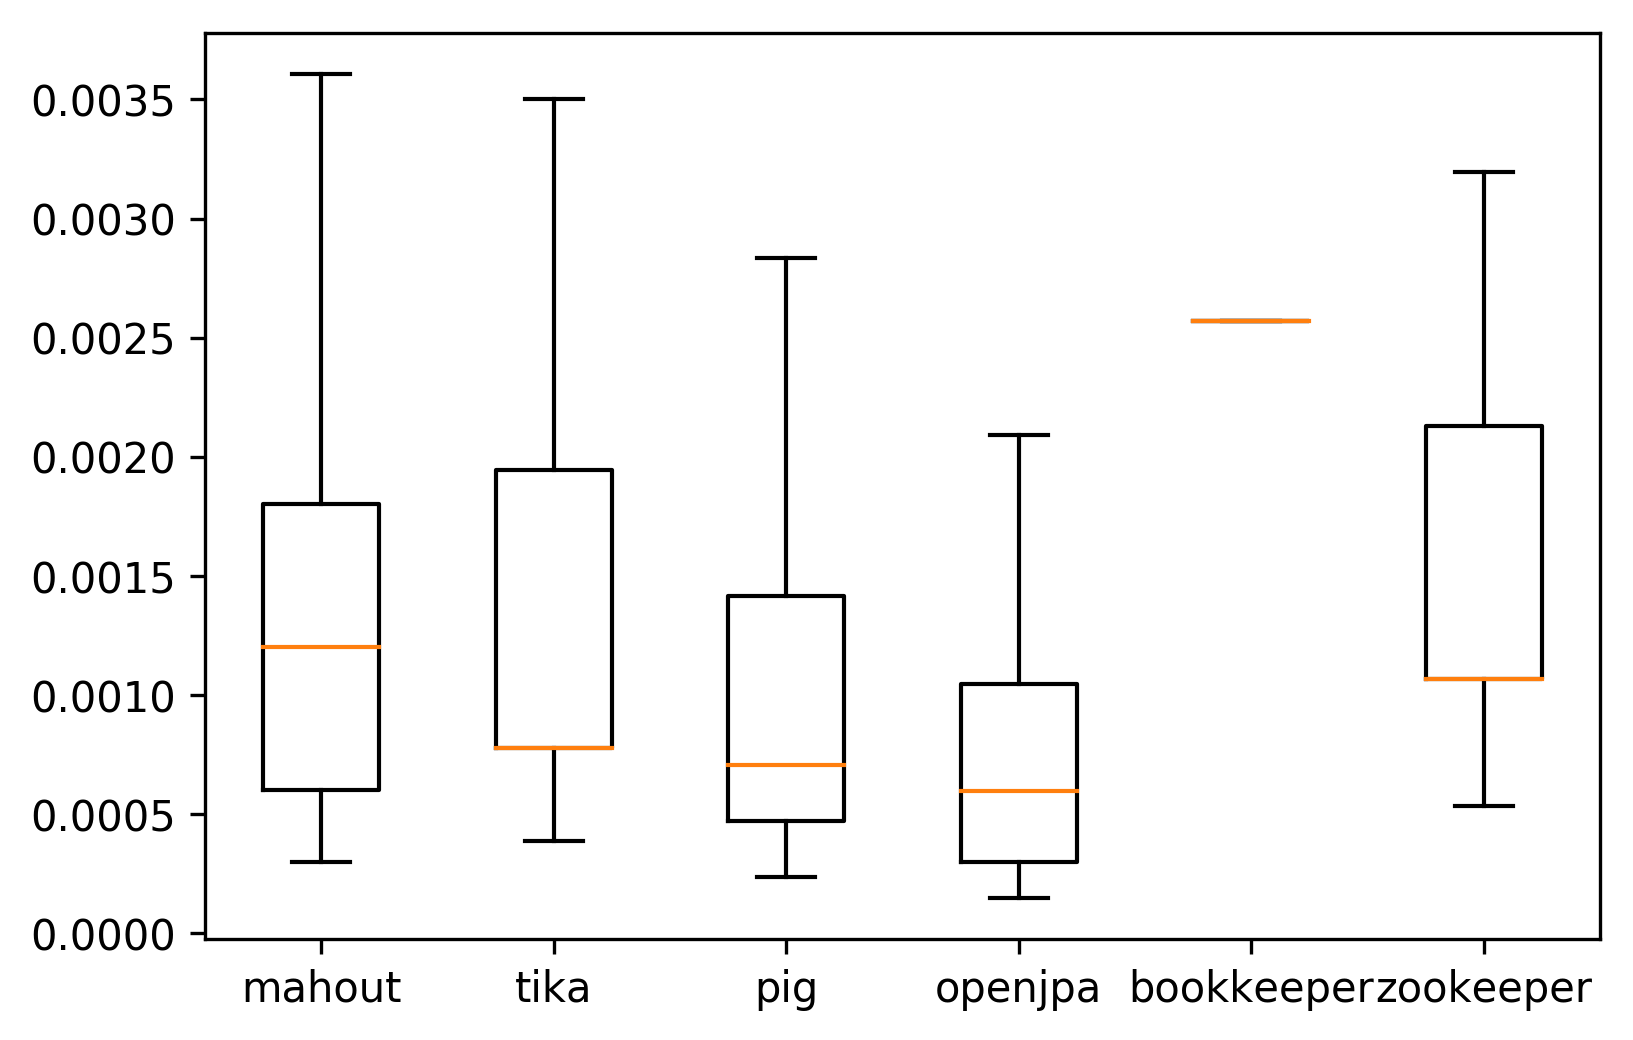

In [7]:
# plot the change proneness for all Java file paths in each project
project_names = list(project_path_icp.keys())
project_icp_series = list()
for path_icp in project_path_icp.values():
    project_icp_series.append(list(path_icp.values()))
fig = plt.figure(dpi=300)
fig.gca().boxplot(project_icp_series, labels=project_names, showfliers=False)
plt.show()

In [15]:
project_goldsets = dict()
for filename in goldset_filenames:
    goldset = get_goldset(filename)
    project_goldsets[goldset.project_name] = goldset

for project_name, goldset in project_goldsets.items():
    print(project_name, 'has', len(goldset.issue_paths), 'issues in its goldset')

mahout has 76 issues in its goldset
tika has 36 issues in its goldset
pig has 185 issues in its goldset
openjpa has 131 issues in its goldset
bookkeeper has 143 issues in its goldset
zookeeper has 243 issues in its goldset


In [9]:
project_goldset_icp = dict()
for project_name, goldset in project_goldsets.items():
    path_icp = project_path_icp[project_name]
    project_goldset_icp[project_name] = get_goldset_internal_change_proneness(path_icp, goldset)

for project_name, goldset_icp in project_goldset_icp.items():
    print(project_name, 'has', len(goldset_icp), 'Java file paths in its goldset')

mahout has 2576 Java file paths in its goldset
tika has 125 Java file paths in its goldset
pig has 946 Java file paths in its goldset
openjpa has 365 Java file paths in its goldset
bookkeeper has 476 Java file paths in its goldset
zookeeper has 351 Java file paths in its goldset


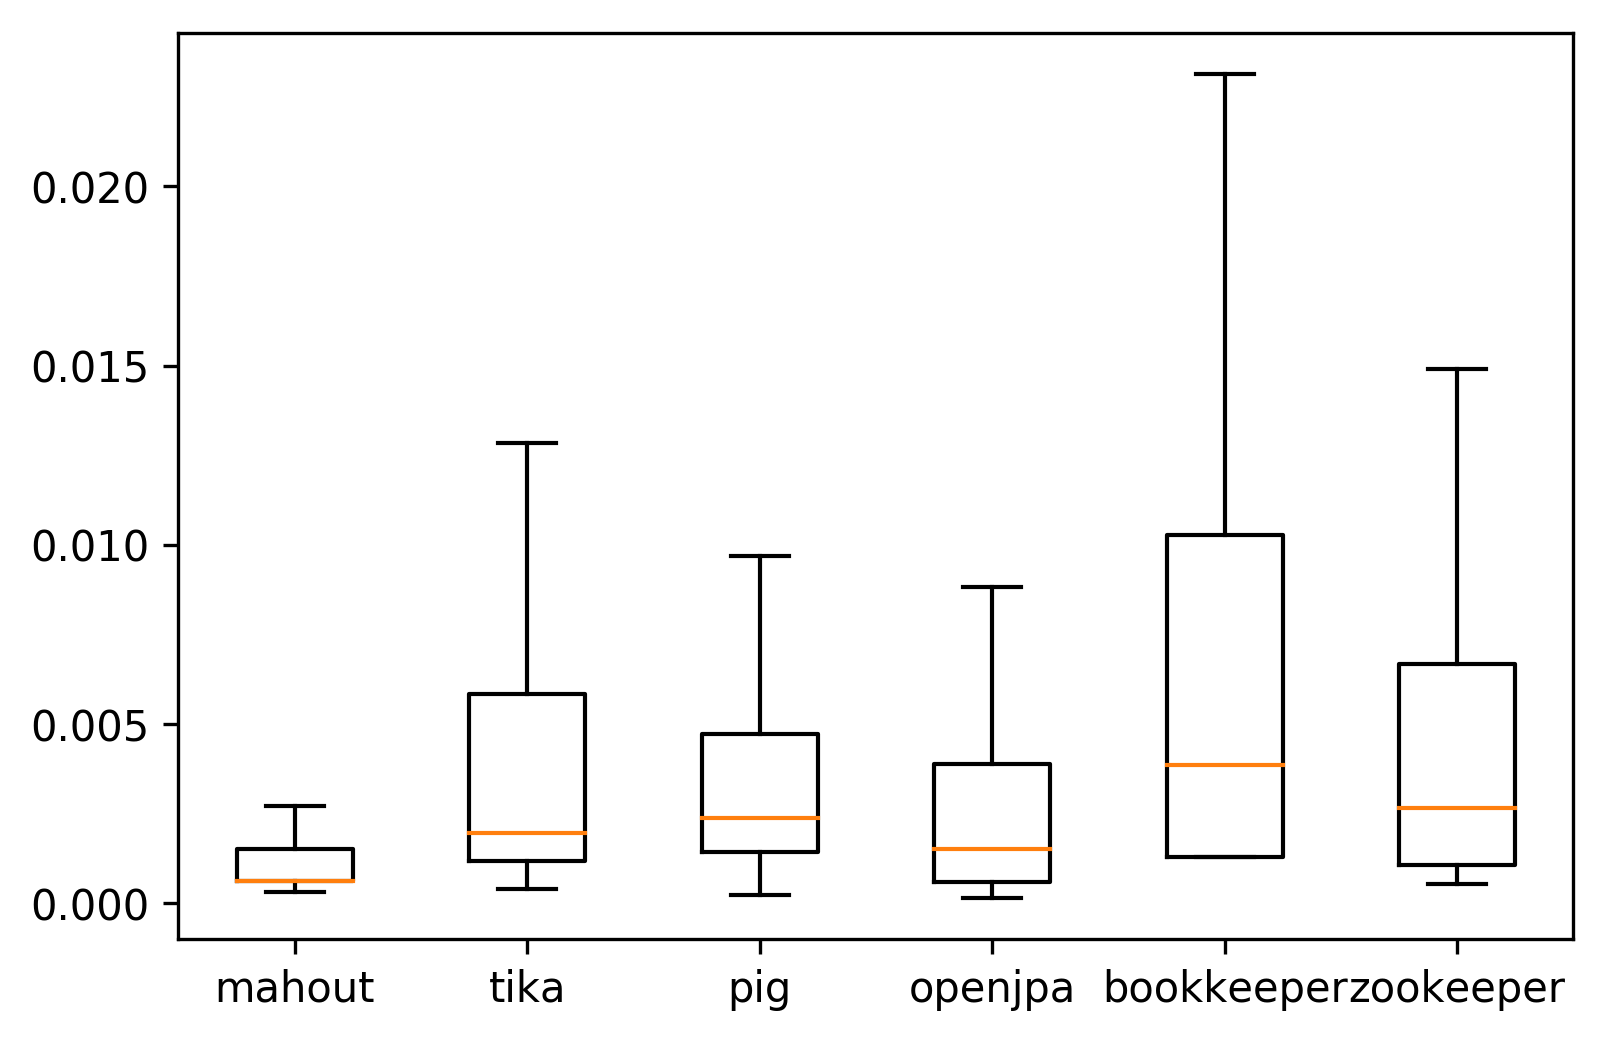

In [10]:
# plot the change proneness for the goldset Java file paths in each project
project_names = list(project_goldset_icp.keys())
project_goldset_icp_series = list()
for goldset_icp in project_goldset_icp.values():
    project_goldset_icp_series.append(goldset_icp)
fig = plt.figure(dpi=300)
fig.gca().boxplot(project_goldset_icp_series, labels=project_names, showfliers=False)
plt.show()

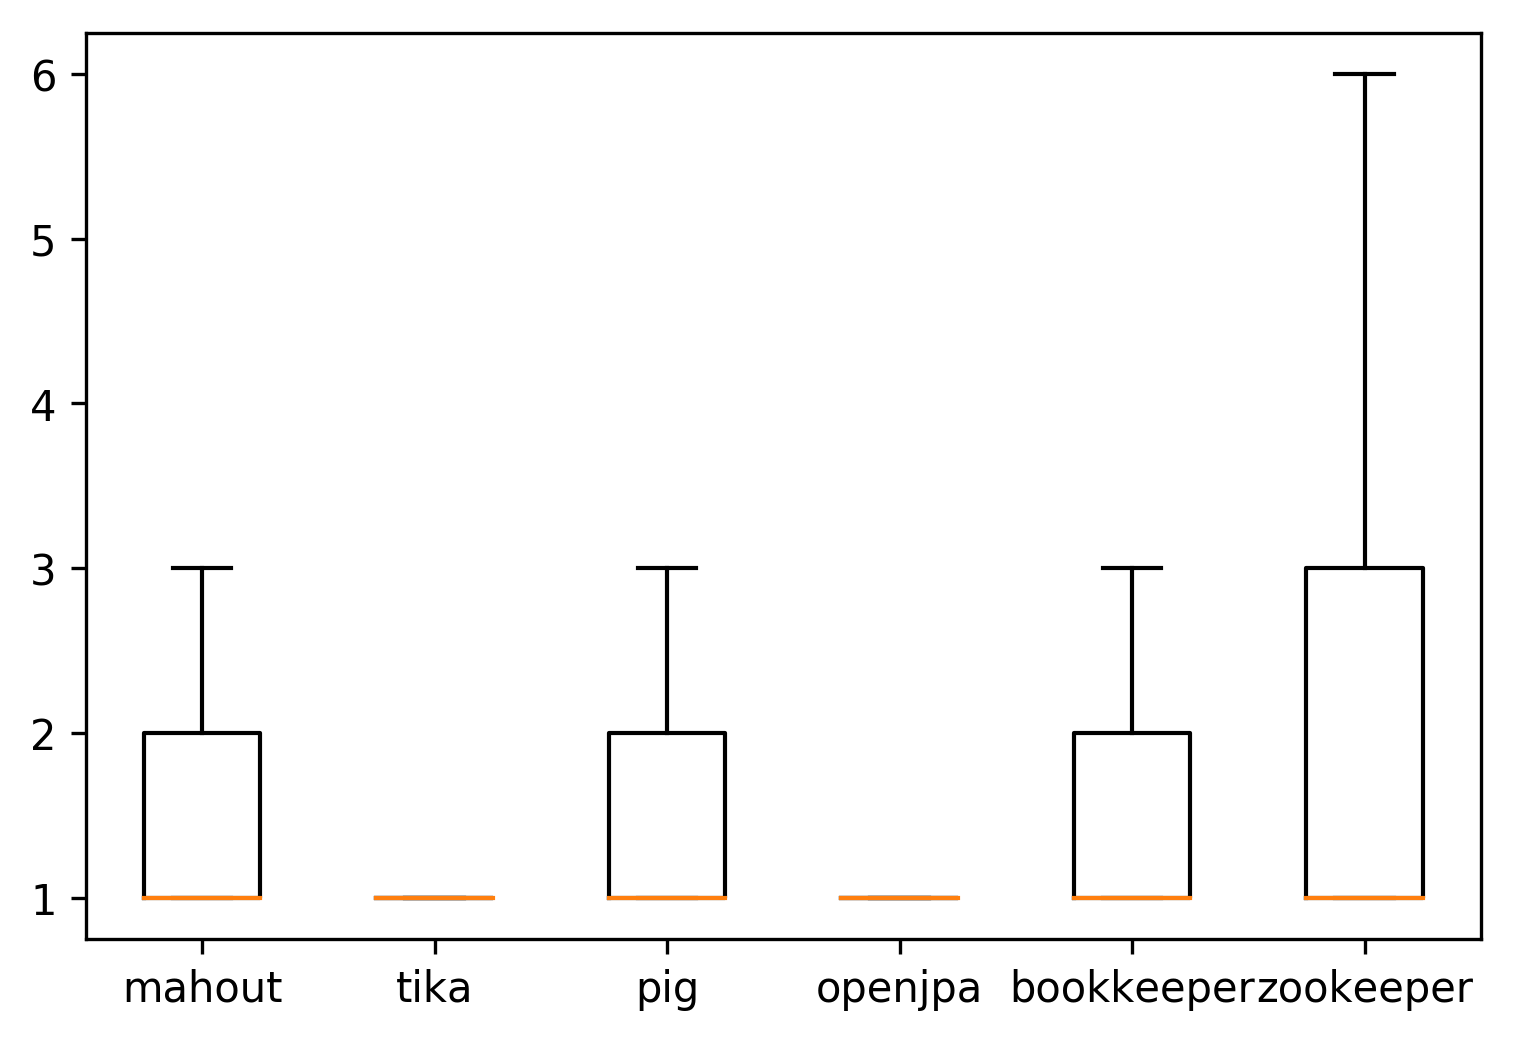

In [16]:
# plot the number of individual goldsets each goldset path belongs to
from itertools import groupby
project_names = list(project_goldsets.keys())
project_series = list()
for project_name in project_names:
    all_goldset_paths = list()
    goldset = project_goldsets[project_name]
    for paths in goldset.issue_paths.values():
        all_goldset_paths.extend(list(paths))
    project_series.append([len(list(group)) for key, group in groupby(sorted(all_goldset_paths))])
fig = plt.figure(dpi=300)
fig.gca().boxplot(project_series, labels=project_names, showfliers=False)
plt.show()